In [1]:
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import numpy as np
import pandas as pd
import os
import time
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import spearmanr
lowess = sm.nonparametric.lowess
import seaborn as sns

In [2]:
os.chdir("/home/lajoyce/Documents/killifish_vs_mouse/analysis/mouse")

In [3]:
df = pd.read_csv("/home/lajoyce/Documents/killifish_vs_mouse/analysis/mouse/MACA_modified_rawcounts.csv")

df.head(10)

,Unnamed: 0,Brain_47-m-18,GAT_39-f-1,Lung_6-f-12,Limb_Muscle_11-m-3,WBC_34-f-9,Small_Intestine_46-m-12,Limb_Muscle_38-m-9,Liver_56-m-6,Lung_17-f-12,...,Spleen_25-m-9,Pancreas_14-m-27,BAT_27-f-6,Kidney_7-m-15,Brain_8-f-12,Brain_22-m-15,WBC_44-f-12,WBC_29-m-9,Spleen_33-f-1,WBC_23-m-3
0,ENSMUSG00000109644,8,29,5,6,3,477,4,2494,7,...,19,7,5,1004,8,16,5,1,9,0
1,ENSMUSG00000007777,118,269,117,209,2,215,96,214,91,...,49,29,1118,136,178,161,3,10,112,2
2,ENSMUSG00000043644,17,40,21,148,9,12,88,12,42,...,24,0,36,14,15,16,15,15,33,7
3,ENSMUSG00000042208,546,570,291,259,41,93,195,327,230,...,152,49,1853,79,657,781,11,17,265,5
4,ENSMUSG00000020831,39,113,40,19,8,14,9,21,33,...,75,11,56,27,56,76,1,4,83,0
5,ENSMUSG00000107002,284,488,204,635,31,537,475,346,183,...,235,88,3577,297,489,577,23,26,347,18
6,ENSMUSG00000058706,10,87,40,24,21,40,25,144,59,...,46,14,85,22,32,27,6,6,141,0
7,ENSMUSG00000099146,18,0,9,0,3,2,3,630,8,...,3,1,0,68,8,7,0,0,3,0
8,ENSMUSG00000028608,419,532,471,222,78,193,190,193,510,...,432,103,916,162,669,647,27,40,651,16
9,ENSMUSG00000097882,19,44,13,30,0,0,14,1,29,...,25,9,6,11,32,16,0,1,20,1


In [4]:
df.rename(columns={"Unnamed: 0": "Gene"}, inplace=True)

In [5]:
df.set_index("Gene", inplace=True)

In [6]:
df = df.T

In [7]:
df_metadata = pd.read_csv("MACA_modified_metadata.csv")

df_metadata.head(1)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model,Sample.name.new
0,A1_384Bulk_Plate1_S1,A1_384Bulk_Plate1_S1,Tabula Muris Senis (bulk RNA seq),BAT_24,Mus musculus C57/BL6,6,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127205,SAMN11854566,Illumina NovaSeq 6000,BAT_24-m-6


In [8]:
df_metadata.set_index("Sample.name.new", inplace=True)

In [9]:
df_new_metadata = df_metadata.loc[df.index.tolist(), ]

df_new_metadata.head(5)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model
Sample.name.new,,,,,,,,,,,,,,
Brain_47-m-18,A10_384Bulk_Plate1_S10,A10_384Bulk_Plate1_S10,Tabula Muris Senis (bulk RNA seq),Brain_47,Mus musculus C57/BL6,18,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127203,SAMN11854568,Illumina NovaSeq 6000
GAT_39-f-1,A10_384Bulk_Plate2_S10,A10_384Bulk_Plate2_S10,Tabula Muris Senis (bulk RNA seq),GAT_39,Mus musculus C57/BL6,1,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127204,SAMN11854569,Illumina NovaSeq 6000
Lung_6-f-12,A10_384Bulk_Plate3_S10,A10_384Bulk_Plate3_S10,Tabula Muris Senis (bulk RNA seq),Lung_6,Mus musculus C57/BL6,12,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127371,SAMN11854570,Illumina NovaSeq 6000
Limb_Muscle_11-m-3,A11_384Bulk_Plate1_S11,A11_384Bulk_Plate1_S11,Tabula Muris Senis (bulk RNA seq),Limb_Muscle_11,Mus musculus C57/BL6,3,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127373,SAMN11854571,Illumina NovaSeq 6000
WBC_34-f-9,A11_384Bulk_Plate2_S11,A11_384Bulk_Plate2_S11,Tabula Muris Senis (bulk RNA seq),WBC_34,Mus musculus C57/BL6,9,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127107,SAMN11854572,Illumina NovaSeq 6000


# Brain

In [10]:
brain_df_metadata = df_new_metadata[df_new_metadata["source.name"].str.startswith("Brain")]

brain_df_metadata.head(3)

,Unnamed: 0,Sample.name,title,source.name,organism,characteristics..age,characteristics..developmental.stage,characteristics..sex,molecule,description,processed.data.file,raw.file,BioSample,Instrument.Model
Sample.name.new,,,,,,,,,,,,,,
Brain_47-m-18,A10_384Bulk_Plate1_S10,A10_384Bulk_Plate1_S10,Tabula Muris Senis (bulk RNA seq),Brain_47,Mus musculus C57/BL6,18,months postnatal,m,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127203,SAMN11854568,Illumina NovaSeq 6000
Brain_51-f-18,A13_384Bulk_Plate3_S13,A13_384Bulk_Plate3_S13,Tabula Muris Senis (bulk RNA seq),Brain_51,Mus musculus C57/BL6,18,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127027,SAMN11854579,Illumina NovaSeq 6000
Brain_20-f-21,A18_384Bulk_Plate1_S18,A18_384Bulk_Plate1_S18,Tabula Muris Senis (bulk RNA seq),Brain_20,Mus musculus C57/BL6,21,months postnatal,f,total RNA,NaN,190214_A00111_0269_AHH3J3DSXX__190214_A00111_0...,SRR9127073,SAMN11854589,Illumina NovaSeq 6000


In [11]:
brain_df_counts = df.loc[brain_df_metadata.index.tolist(),]

brain_df_counts.head(3)

Gene,ENSMUSG00000109644,ENSMUSG00000007777,ENSMUSG00000043644,ENSMUSG00000042208,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000099146,ENSMUSG00000028608,ENSMUSG00000097882,...,ENSMUSG00000096015,ENSMUSG00000096037,ENSMUSG00000095183,ENSMUSG00000094760,ENSMUSG00000095749,ENSMUSG00000094657,ENSMUSG00000095645,ENSMUSG00000096765,ENSMUSG00000096170,ENSMUSG00000095453
Brain_47-m-18,8,118,17,546,39,284,10,18,419,19,...,0,0,0,0,0,0,0,0,0,0
Brain_51-f-18,8,67,11,251,26,199,9,1,232,9,...,0,0,0,0,0,0,0,0,0,0
Brain_20-f-21,9,138,19,640,56,381,12,18,482,23,...,0,0,0,0,0,0,0,0,0,0


In [12]:
brain_df_age = brain_df_counts.copy()

In [13]:
brain_df_age["age"] = brain_df_metadata["characteristics..age"].tolist()

In [14]:
brain_df_age.head(5)

Gene,ENSMUSG00000109644,ENSMUSG00000007777,ENSMUSG00000043644,ENSMUSG00000042208,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000099146,ENSMUSG00000028608,ENSMUSG00000097882,...,ENSMUSG00000096037,ENSMUSG00000095183,ENSMUSG00000094760,ENSMUSG00000095749,ENSMUSG00000094657,ENSMUSG00000095645,ENSMUSG00000096765,ENSMUSG00000096170,ENSMUSG00000095453,age
Brain_47-m-18,8,118,17,546,39,284,10,18,419,19,...,0,0,0,0,0,0,0,0,0,18
Brain_51-f-18,8,67,11,251,26,199,9,1,232,9,...,0,0,0,0,0,0,0,0,0,18
Brain_20-f-21,9,138,19,640,56,381,12,18,482,23,...,0,0,0,0,0,0,0,0,0,21
Brain_39-m-12,22,133,23,593,71,395,4,17,439,12,...,0,0,0,0,0,0,0,0,0,12
Brain_4-m-3,11,148,23,907,44,451,28,6,577,7,...,0,0,0,0,0,0,0,0,0,3


In [15]:
brain_df_age["age"].value_counts()

age
18    6
21    6
12    6
3     6
6     6
1     6
9     5
15    5
24    4
27    3
Name: count, dtype: int64

In [16]:
# Ensure the 'age' column is numeric
brain_df_age['age'] = pd.to_numeric(brain_df_age['age'], errors='coerce')

# Drop rows where 'age' could not be converted and resulted in NaN
brain_df_age = brain_df_age.dropna(subset=['age'])

# Convert the 'age' column to a list
age_list = brain_df_age['age'].tolist()

# Verify the conversion
print(age_list)

[18, 18, 21, 12, 3, 9, 9, 6, 3, 9, 1, 18, 21, 3, 21, 12, 3, 21, 9, 3, 18, 15, 1, 6, 1, 24, 3, 6, 6, 12, 6, 1, 24, 27, 12, 24, 9, 24, 15, 27, 6, 21, 15, 18, 15, 12, 21, 1, 1, 18, 27, 12, 15]


In [17]:
brain_df_frequency = brain_df_counts.div(brain_df_counts.sum(axis=1), axis=0)

brain_df_frequency.head(3)

Gene,ENSMUSG00000109644,ENSMUSG00000007777,ENSMUSG00000043644,ENSMUSG00000042208,ENSMUSG00000020831,ENSMUSG00000107002,ENSMUSG00000058706,ENSMUSG00000099146,ENSMUSG00000028608,ENSMUSG00000097882,...,ENSMUSG00000096015,ENSMUSG00000096037,ENSMUSG00000095183,ENSMUSG00000094760,ENSMUSG00000095749,ENSMUSG00000094657,ENSMUSG00000095645,ENSMUSG00000096765,ENSMUSG00000096170,ENSMUSG00000095453
Brain_47-m-18,9.778084e-07,0.000014,0.000002,0.000067,0.000005,0.000035,0.000001,2.200069e-06,0.000051,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain_51-f-18,1.786970e-06,0.000015,0.000002,0.000056,0.000006,0.000044,0.000002,2.233713e-07,0.000052,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain_20-f-21,8.596677e-07,0.000013,0.000002,0.000061,0.000005,0.000036,0.000001,1.719335e-06,0.000046,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
brain_age = brain_df_age["age"]

In [19]:
brain_spearman_corr = brain_df_frequency.corrwith(brain_age, method="spearman")

brain_sorted_corr = brain_spearman_corr.abs().sort_values(ascending=False)

/home/lajoyce/Documents/USQIS_2023/qiskit/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [31]:
brain_spearman_corr

Gene
ENSMUSG00000109644    0.267270
ENSMUSG00000007777   -0.210160
ENSMUSG00000043644    0.060799
ENSMUSG00000042208   -0.399487
ENSMUSG00000020831   -0.083618
                        ...   
ENSMUSG00000094657         NaN
ENSMUSG00000095645         NaN
ENSMUSG00000096765         NaN
ENSMUSG00000096170         NaN
ENSMUSG00000095453         NaN
Length: 24616, dtype: float64

In [20]:
brain_spearman_corr.shape

(24616,)

In [32]:
# Count the total number of genes
total_genes = brain_spearman_corr.shape[0]

# Count the number of positive, negative, and zero Spearman rank correlations
positive_count = (brain_spearman_corr > 0).sum()
negative_count = (brain_spearman_corr < 0).sum()
zero_count = (brain_spearman_corr == 0).sum()

# Check for NaN values
nan_count = brain_spearman_corr.isna().sum()

# Print the counts
print(f"Total number of genes: {total_genes}")
print(f"Number of positive Spearman rank: {positive_count}")
print(f"Number of negative Spearman rank: {negative_count}")
print(f"Number of zero Spearman rank: {zero_count}")
print(f"Number of NaN values: {nan_count}")

# Sum of all types
sum_counts = positive_count + negative_count + zero_count + nan_count
print(f"Sum of positive, negative, zero, and NaN counts: {sum_counts}")


Total number of genes: 24616
Number of positive Spearman rank: 16108
Number of negative Spearman rank: 7874
Number of zero Spearman rank: 3
Number of NaN values: 631
Sum of positive, negative, zero, and NaN counts: 24616


In [23]:
# Drop any rows with NaN values
brain_spearman_corr_without_nan = brain_spearman_corr.dropna()

In [26]:
brain_spearman_corr_without_nan

Gene
ENSMUSG00000109644    0.267270
ENSMUSG00000007777   -0.210160
ENSMUSG00000043644    0.060799
ENSMUSG00000042208   -0.399487
ENSMUSG00000020831   -0.083618
                        ...   
ENSMUSG00000029860    0.104573
ENSMUSG00000055670    0.164278
ENSMUSG00000039068    0.165291
ENSMUSG00000027596    0.284453
ENSMUSG00000021850    0.288185
Length: 23985, dtype: float64

In [29]:
brain_spearman_corr_without_nan.shape

(23985,)

In [30]:
# Count the total number of genes
total_genes = brain_spearman_corr_without_nan.shape[0]

# Count the number of positive, negative, and zero Spearman rank correlations
positive_count = (brain_spearman_corr_without_nan > 0).sum()
negative_count = (brain_spearman_corr_without_nan < 0).sum()
zero_count = (brain_spearman_corr_without_nan == 0).sum()

# Check for NaN values
nan_count = brain_spearman_corr_without_nan.isna().sum()

# Print the counts
print(f"Total number of genes: {total_genes}")
print(f"Number of positive Spearman rank: {positive_count}")
print(f"Number of negative Spearman rank: {negative_count}")
print(f"Number of zero Spearman rank: {zero_count}")
print(f"Number of NaN values: {nan_count}")

# Sum of all types
sum_counts = positive_count + negative_count + zero_count + nan_count
print(f"Sum of positive, negative, zero, and NaN counts: {sum_counts}")


Total number of genes: 23985
Number of positive Spearman rank: 16108
Number of negative Spearman rank: 7874
Number of zero Spearman rank: 3
Number of NaN values: 0
Sum of positive, negative, zero, and NaN counts: 23985


In [28]:
16108+7874

23982

In [21]:
xed

NameError: name 'xed' is not defined

# Plot of Brain Top 12 Genes

In [ ]:
brain_top_12_abs_spearman_ranks = brain_sorted_corr.head(12).index.tolist()

brain_top_12_abs_spearman_ranks

['ENSMUSG00000073418',
 'ENSMUSG00000061232',
 'ENSMUSG00000038642',
 'ENSMUSG00000092274',
 'ENSMUSG00000069516',
 'ENSMUSG00000033880',
 'ENSMUSG00000073411',
 'ENSMUSG00000024164',
 'ENSMUSG00000000290',
 'ENSMUSG00000074896',
 'ENSMUSG00000051242',
 'ENSMUSG00000028581']

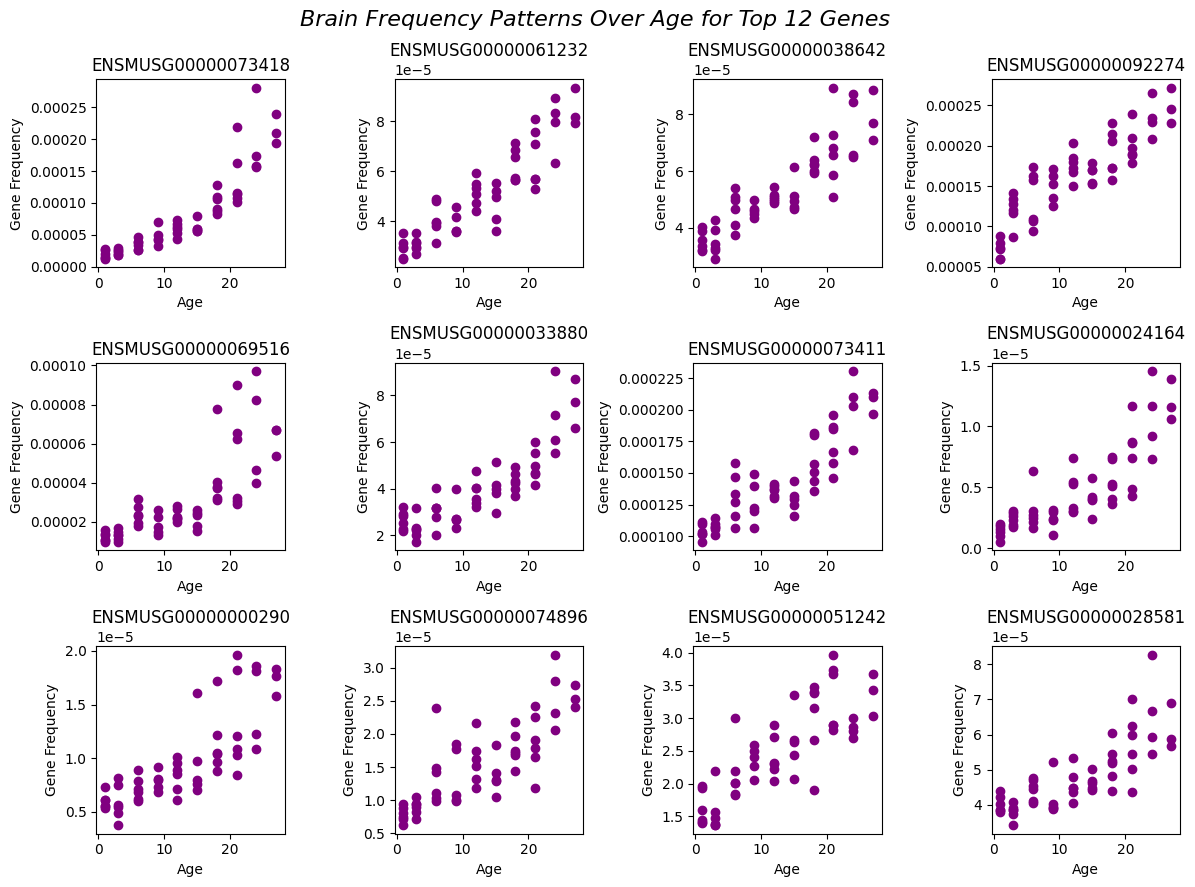

In [ ]:
# Number of genes
num_genes = 12

# Calculate the number of rows and columns for the subplots
num_rows = 3
num_cols = num_genes // num_rows + (num_genes % num_rows > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3*num_rows))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Iterate over gene names and create individual subplots
for i, gene_name in enumerate(brain_top_12_abs_spearman_ranks):
    axes[i].scatter(brain_df_age['age'], brain_df_frequency[gene_name], color="purple")
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(f'Gene Frequency')
    axes[i].set_title(f'{gene_name}')

# Remove empty subplots if the number of genes is not a multiple of num_rows
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Overall plot title
fig.suptitle('Brain Frequency Patterns Over Age for Top 12 Genes', fontsize=16, fontstyle="italic")

# Adjust layout for better spacing
plt.tight_layout()


plt.show()  # Show the combined plot

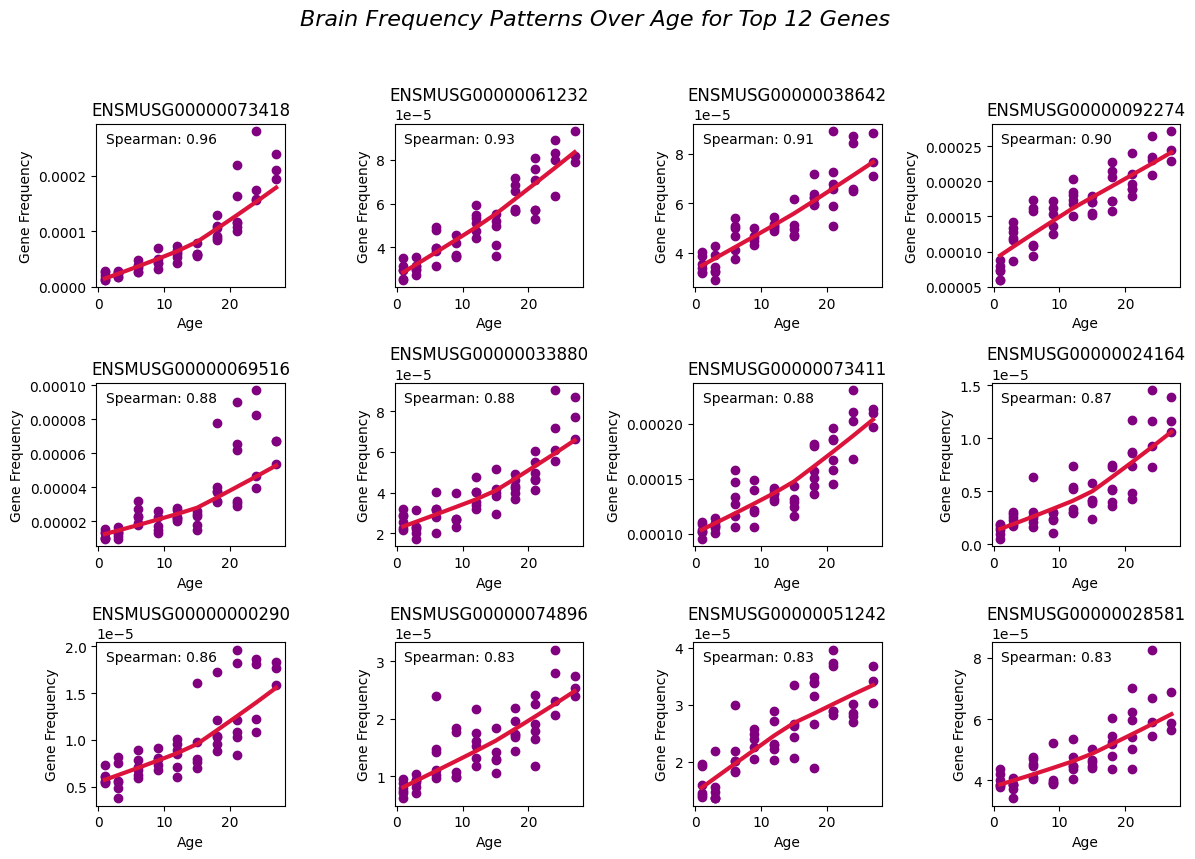

In [ ]:
# Number of genes
num_genes = len(brain_top_12_abs_spearman_ranks)

# Calculate the number of rows and columns for the subplots
num_rows = 3
num_cols = num_genes // num_rows + (num_genes % num_rows > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3*num_rows))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Iterate over gene names and create individual subplots
for i, gene_name in enumerate(brain_top_12_abs_spearman_ranks):
    x = brain_df_age['age']
    y = brain_df_frequency[gene_name]
    
    # Calculate Spearman correlation
    spearman_corr, _ = spearmanr(x, y)
    
    # Plot scatter
    axes[i].scatter(x, y, color="purple")
    
    # Add LOWESS fit line
    lowess_fit = lowess(y, x, frac=1.0)
    axes[i].plot(lowess_fit[:, 0], lowess_fit[:, 1], color='crimson', linewidth=3)
    
    # Add Spearman correlation text
    axes[i].text(0.05, 0.95, f'Spearman: {spearman_corr:.2f}', transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top')
    
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(f'Gene Frequency')
    axes[i].set_title(f'{gene_name}')

# Remove empty subplots if the number of genes is not a multiple of num_rows
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Overall plot title
fig.suptitle('Brain Frequency Patterns Over Age for Top 12 Genes', fontsize=16, fontstyle="italic")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
#output_path = '/home/lajoyce/Documents/transcriptomics/plots/brain_frequency_patterns_with_spearman_lowess.pdf'
#fig.savefig(output_path)
#print(f'Main figure saved as {output_path}')

# Show the combined plot
plt.show()

# Brain Dual Scatterplot

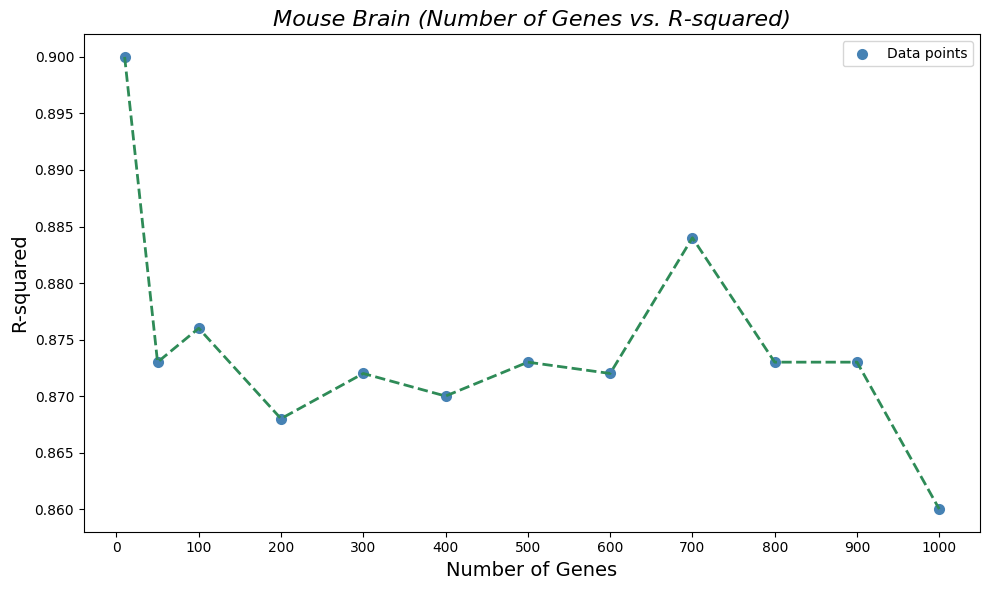

In [ ]:

# Define your data
number_of_genes = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
brain_r_squared = [0.90, 0.873, 0.876, 0.868, 0.872, 0.87, 0.873, 0.872, 0.884, 0.873, 0.873, 0.86]
brain_mae = [1.96, 2.06, 1.96, 2.17, 2.04, 2.11, 2.02, 2.11, 1.94, 1.94, 1.94, 2.06]

# Create scatter plot for Number of Genes vs R-squared
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(number_of_genes, brain_r_squared, color='steelblue', linewidth=2, label='Data points')
ax.plot(number_of_genes, brain_r_squared, color='seagreen', linestyle='--', linewidth=2)  # Connecting line
ax.set_xlabel('Number of Genes', fontsize=14)
ax.set_ylabel('R-squared', fontsize=14)
ax.set_title('Mouse Brain (Number of Genes vs. R-squared)', fontsize=16, fontstyle="italic")

# Add more labels to the x-axis
x_ticks = np.arange(0, 1100, 100)
ax.set_xticks(x_ticks)

ax.legend()

plt.tight_layout()

# Save the plot
#output_path = '/home/lajoyce/Documents/transcriptomics/plots/brain_r_squared.pdf'
#fig.savefig(output_path)
#print(f'Main figure saved as {output_path}')

plt.show()


Bar plot saved as /home/lajoyce/Documents/transcriptomics/plots/brain_r_squared_bar_plot.pdf


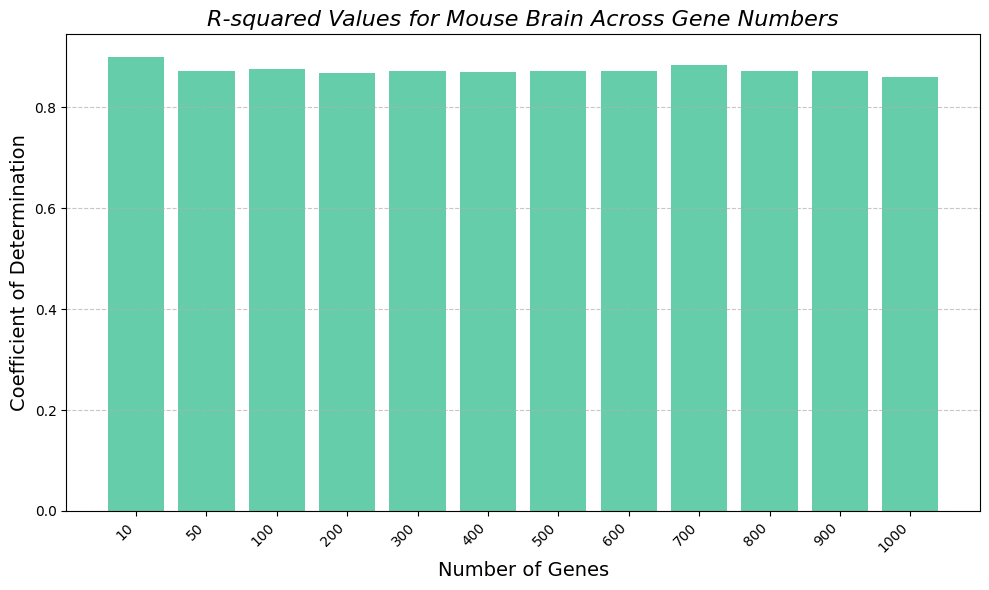

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

# Define your data
number_of_genes = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
brain_r_squared = [0.90, 0.873, 0.876, 0.868, 0.872, 0.87, 0.873, 0.872, 0.884, 0.873, 0.873, 0.86]

# Convert number_of_genes to strings for categorical x-axis
number_of_genes_str = [str(g) for g in number_of_genes]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(number_of_genes_str, brain_r_squared, color='mediumaquamarine')

# Add labels and title
ax.set_xlabel('Number of Genes', fontsize=14)
ax.set_ylabel('Coefficient of Determination', fontsize=14)
ax.set_title('R-squared Values for Mouse Brain Across Gene Numbers', fontsize=16, fontstyle="italic")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot (uncomment to save)
output_path = '/home/lajoyce/Documents/transcriptomics/plots/brain_r_squared_bar_plot.pdf'
fig.savefig(output_path)
print(f'Bar plot saved as {output_path}')

# Show the plot
plt.show()


In [ ]:
x

Brain_47-m-18    18
Brain_51-f-18    18
Brain_20-f-21    21
Brain_39-m-12    12
Brain_4-m-3       3
Brain_5-m-9       9
Brain_24-f-9      9
Brain_40-m-6      6
Brain_17-m-3      3
Brain_6-m-9       9
Brain_16-m-1      1
Brain_52-f-18    18
Brain_30-m-21    21
Brain_35-m-3      3
Brain_43-m-21    21
Brain_14-m-12    12
Brain_34-f-3      3
Brain_1-m-21     21
Brain_53-m-9      9
Brain_50-f-3      3
Brain_44-m-18    18
Brain_21-m-15    15
Brain_28-f-1      1
Brain_25-m-6      6
Brain_19-f-1      1
Brain_23-m-24    24
Brain_56-m-3      3
Brain_45-m-6      6
Brain_49-m-6      6
Brain_15-m-12    12
Brain_18-f-6      6
Brain_7-m-1       1
Brain_54-m-24    24
Brain_26-m-27    27
Brain_48-m-12    12
Brain_36-m-24    24
Brain_13-m-9      9
Brain_46-m-24    24
Brain_42-f-15    15
Brain_37-m-27    27
Brain_31-f-6      6
Brain_11-m-21    21
Brain_27-m-15    15
Brain_10-m-18    18
Brain_41-m-15    15
Brain_38-f-12    12
Brain_12-f-21    21
Brain_2-m-1       1
Brain_3-m-1       1
Brain_55-m-18    18


Main figure saved as /home/lajoyce/Documents/transcriptomics/plots/brain_r_squared_scatter_plot_bar_plot.pdf


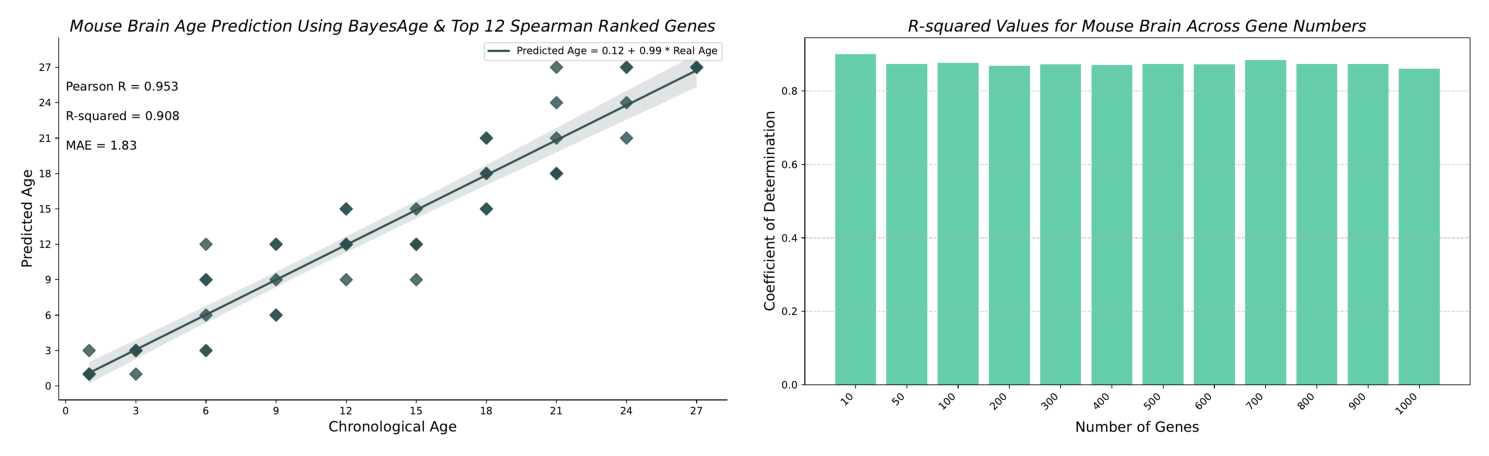

In [ ]:
# List of file paths
file_paths = [
    '/home/lajoyce/Documents/transcriptomics/plots/mouse_brain_BayesAge_predictions.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/brain_r_squared_bar_plot.pdf',
]

# Convert each PDF to an image
images = [convert_from_path(file_path)[0] for file_path in file_paths]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Change 2, 2 to 1, 2 for side-by-side

# Plot each image in a subplot
for ax, img in zip(axs.flat, images):
    ax.imshow(img)
    ax.axis('off')

# Adjust layout and save the figure
plt.tight_layout()

# Save the combined figure
output_path = '/home/lajoyce/Documents/transcriptomics/plots/brain_r_squared_scatter_plot_bar_plot.pdf'
fig.savefig(output_path)
print(f'Main figure saved as {output_path}')

plt.show()

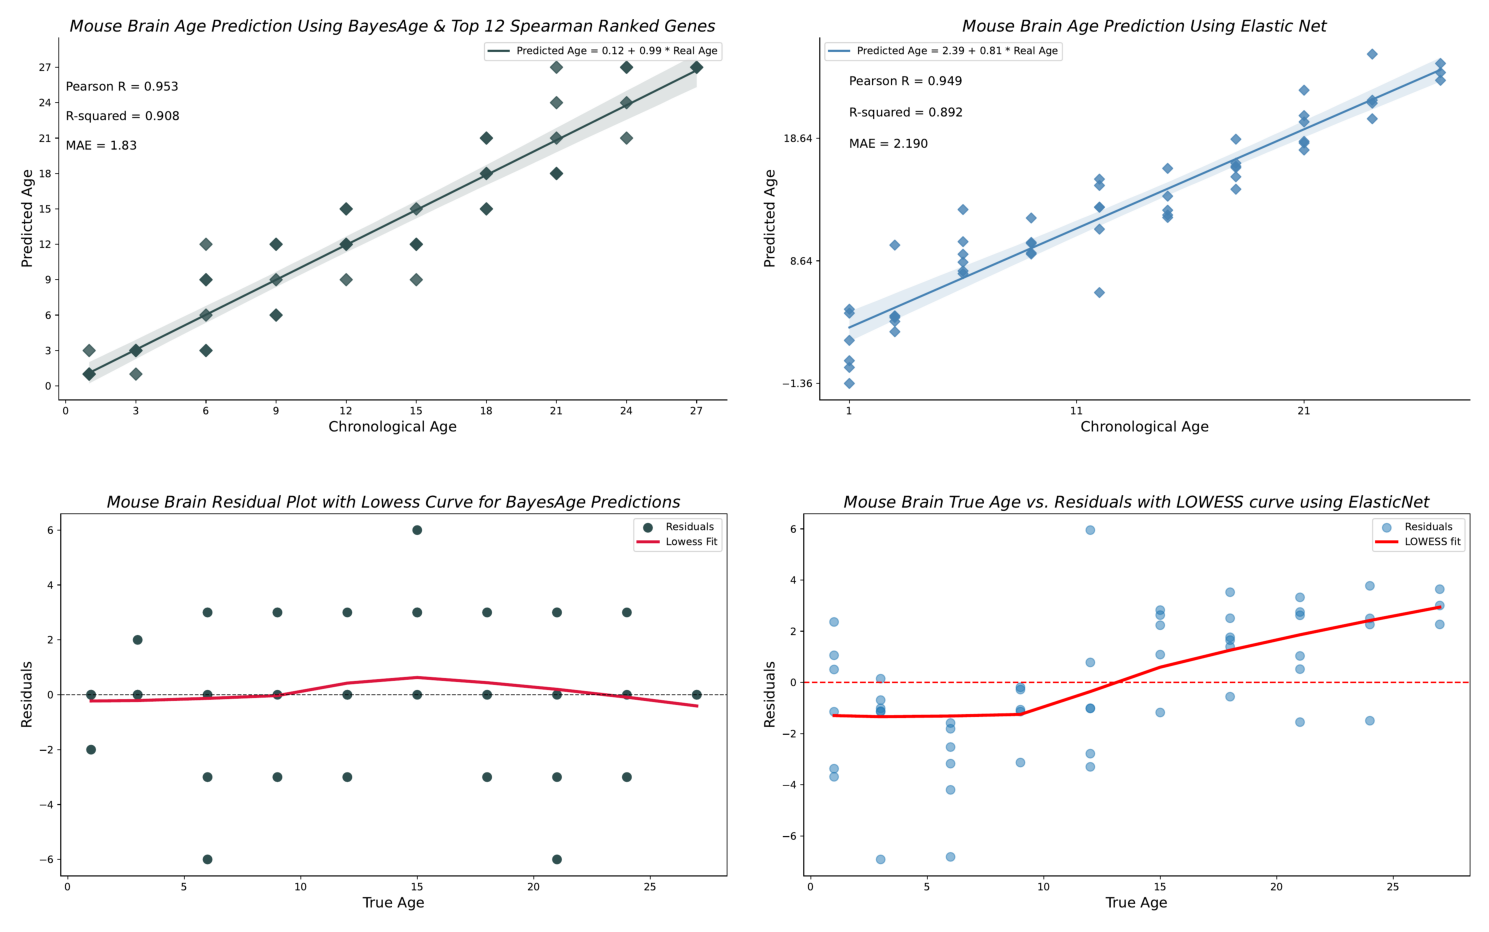

In [ ]:
# List of file paths
file_paths = [
    '/home/lajoyce/Documents/transcriptomics/plots/mouse_brain_BayesAge_predictions.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mouse_brain_elastic_net.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mouse_brain_BayesAge_predictions_residuals.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mouse_brain_elastic_net_residuals.pdf'
]

# Convert each PDF to an image
images = [convert_from_path(file_path)[0] for file_path in file_paths]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot each image in a subplot
for ax, img in zip(axs.flat, images):
    ax.imshow(img)
    ax.axis('off')

# Adjust layout and save the figure
plt.tight_layout()
output_path = '/home/lajoyce/Documents/transcriptomics/plots/brain_BayesAge_vs_ElasticNet_main_figure.pdf'
plt.savefig(output_path)
plt.show()

#print(f'Main figure saved as {output_path}')

In [ ]:
xed

NameError: name 'xed' is not defined

# R-squared across tissues using a bar plot.

Bar plot saved as /home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_tissues_r_squared.pdf


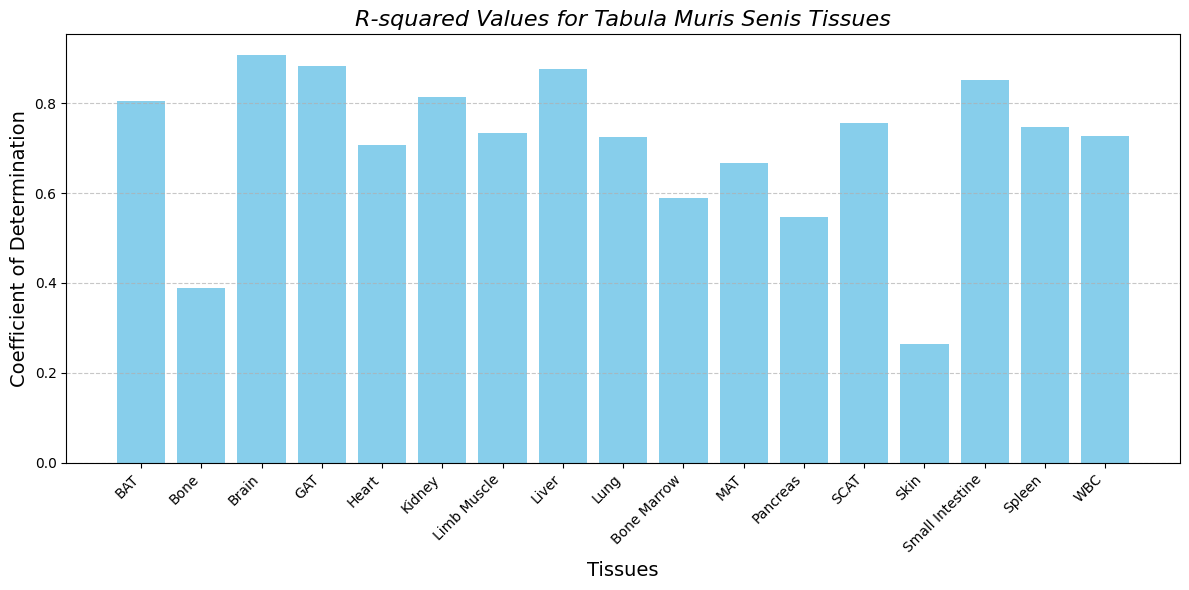

In [ ]:
# Sample data for 17 tissues and their corresponding R-squared values
tissues = ["BAT", "Bone", "Brain", "GAT", "Heart", "Kidney", "Limb Muscle", "Liver", "Lung", "Bone Marrow", "MAT", "Pancreas", "SCAT", 
           "Skin", "Small Intestine", "Spleen", "WBC"
]

r_squared_values = [.804, 0.388, 0.908, 0.884, 0.706, 0.813, 0.733, 0.876, 0.725,
                    0.59, 0.668, 0.547, 0.756, 0.265, 0.851, 0.747, 0.726]

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(tissues, r_squared_values, color='skyblue')

# Add labels and title
ax.set_xlabel('Tissues', fontsize=14)
ax.set_ylabel('Coefficient of Determination', fontsize=14)
ax.set_title('R-squared Values for Tabula Muris Senis Tissues', fontsize=16, fontstyle="italic")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
output_path = '/home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_tissues_r_squared.pdf'
fig.savefig(output_path)
print(f'Bar plot saved as {output_path}')

# Show the plot
plt.show()


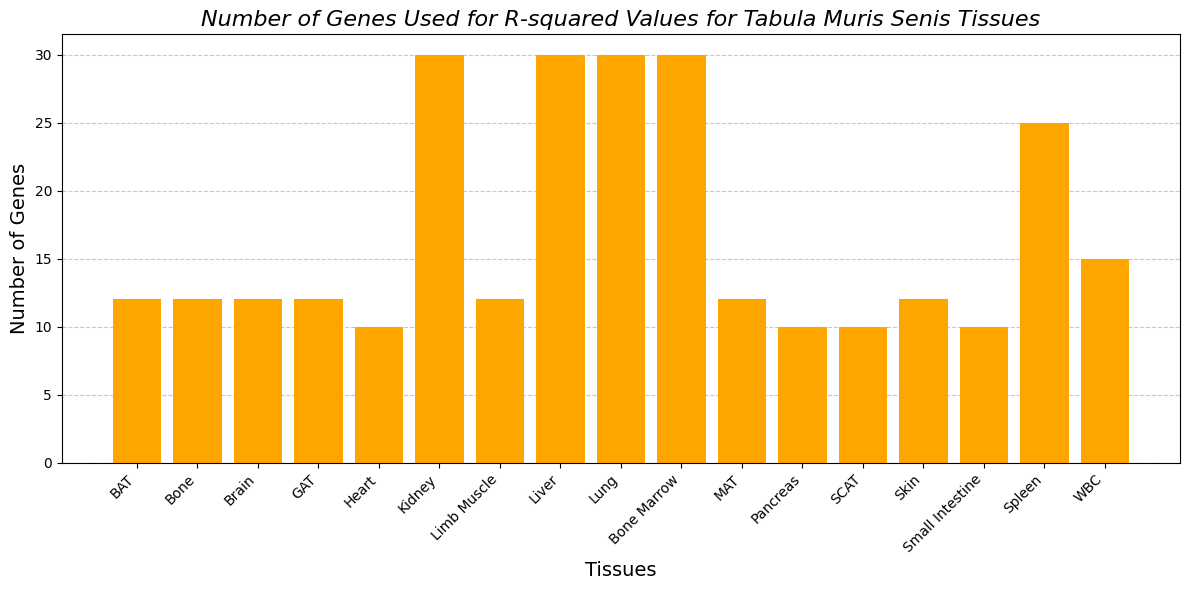

In [ ]:
# Sample data for 17 tissues, their corresponding R-squared values, and number of genes used
tissues = ["BAT", "Bone", "Brain", "GAT", "Heart", "Kidney", "Limb Muscle", "Liver", "Lung", "Bone Marrow", "MAT", "Pancreas", "SCAT", 
           "Skin", "Small Intestine", "Spleen", "WBC"
]

r_squared_values = [.804, 0.388, 0.908, 0.884, 0.706, 0.813, 0.733, 0.876, 0.725,
                    0.59, 0.668, 0.547, 0.756, 0.265, 0.851, 0.747, 0.726]

number_of_genes = [12, 12, 12, 12, 10, 30, 12, 30, 30, 
                   30, 12, 10, 10, 12, 10, 25, 15
]


# Create a bar plot for the number of genes
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(tissues, number_of_genes, color='orange')

# Add labels and title
ax.set_xlabel('Tissues', fontsize=14)
ax.set_ylabel('Number of Genes', fontsize=14)
ax.set_title('Number of Genes Used for R-squared Values for Tabula Muris Senis Tissues', fontsize=16, fontstyle="italic")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot
#output_path = '/home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_number_of_genes.pdf'
#fig.savefig(output_path)
#print(f'Bar plot saved as {output_path}')

# Show the plot
plt.show()


Main figure saved as /home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_r_squared_number_of_genes.pdf


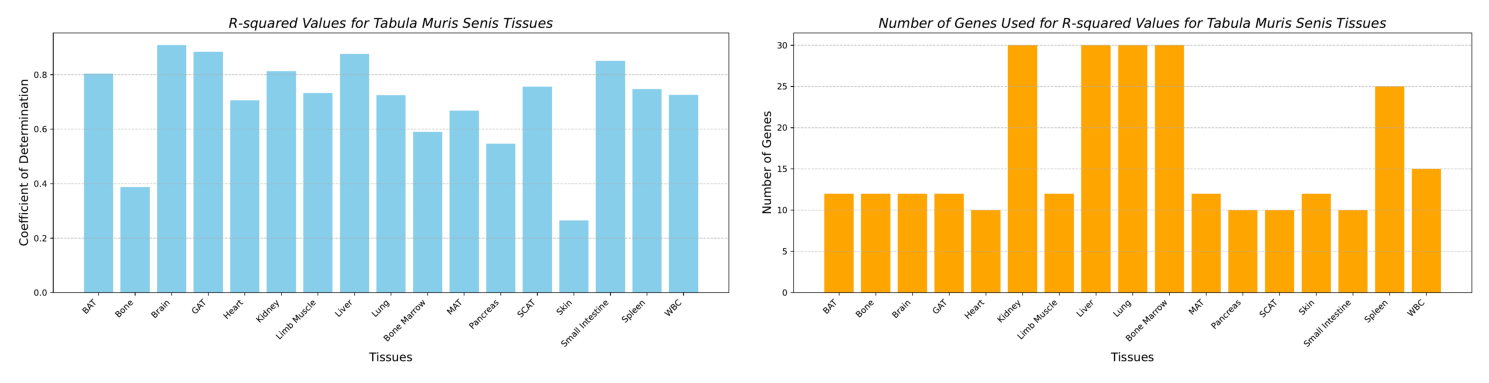

In [ ]:
# List of file paths
file_paths = [
    '/home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_tissues_r_squared.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_number_of_genes.pdf',
]

# Convert each PDF to an image
images = [convert_from_path(file_path)[0] for file_path in file_paths]

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Change 2, 2 to 1, 2 for side-by-side

# Plot each image in a subplot
for ax, img in zip(axs.flat, images):
    ax.imshow(img)
    ax.axis('off')

# Adjust layout and save the figure
plt.tight_layout()

# Save the combined figure
output_path = '/home/lajoyce/Documents/transcriptomics/plots/tabula_muris_senis_r_squared_number_of_genes.pdf'
fig.savefig(output_path)
print(f'Main figure saved as {output_path}')

plt.show()

In [ ]:
cd

# All the tissues + residual analysis

In [ ]:
file_paths = [
    '/home/lajoyce/Documents/transcriptomics/plots/bat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bat_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/GAT_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/gat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/heart_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/heart_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/kidney_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/kidney_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/limb_muscle_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/limb_muscle_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/liver_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/liver_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/lung_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/lung_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_marrow_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_marrow_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/pancreas_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/pancreas_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/scat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/scat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/skin_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/skin_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/small_intestine_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/small_intestine_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/spleen_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/spleen_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/wbc_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/wbc_residual.pdf'
]


/home/lajoyce/Documents/USQIS_2023/qiskit/lib/python3.10/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (172896000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


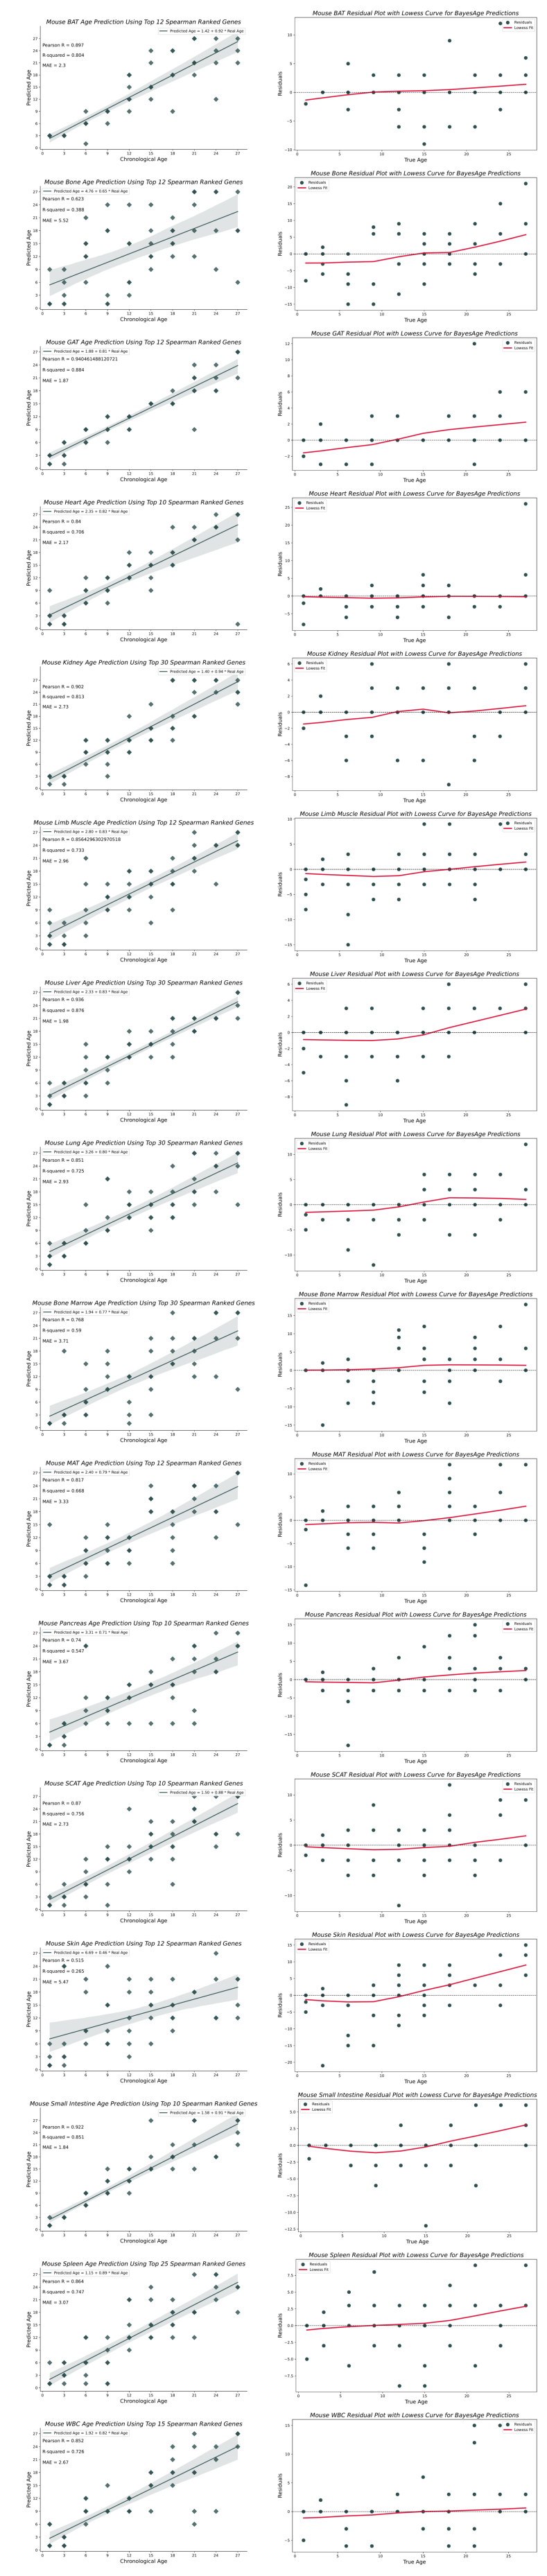

In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt

# List of file paths for the PDF images
file_paths = [
    '/home/lajoyce/Documents/transcriptomics/plots/bat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bat_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/GAT_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/gat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/heart_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/heart_residual_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/kidney_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/kidney_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/limb_muscle_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/limb_muscle_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/liver_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/liver_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/lung_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/lung_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_marrow_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/bone_marrow_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/mat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/pancreas_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/pancreas_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/scat_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/scat_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/skin_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/skin_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/small_intestine_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/small_intestine_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/spleen_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/spleen_residual.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/wbc_scatter_plot.pdf',
    '/home/lajoyce/Documents/transcriptomics/plots/wbc_residual.pdf'
]

# Set a higher DPI for better quality
dpi = 300

# Convert PDF files to images and store them in a list
images = []
for file_path in file_paths:
    pages = convert_from_path(file_path, dpi=dpi)
    images.extend(pages)  # Add all pages as images

# Calculate the width and height for each subplot
max_width = max(image.width for image in images)
max_height = max(image.height for image in images)

# Calculate the total width and height for the final image
total_width = max_width * 2  # Two images per row
total_height = max_height * 16  # Sixteen rows

# Create a new blank image with the calculated dimensions
final_image = Image.new('RGB', (total_width, total_height))

# Paste each image into the final image
y_offset = 0
for i, image in enumerate(images):
    x_offset = (i % 2) * max_width
    y_offset = (i // 2) * max_height
    final_image.paste(image, (x_offset, y_offset))

# Save the combined image
final_image_path = "/home/lajoyce/Documents/transcriptomics/tabula_muris_combined_scatter_plots.png"
final_image.save(final_image_path)

# Display the combined image using matplotlib
final_image = Image.open(final_image_path)
plt.figure(figsize=(12, 48))
plt.imshow(final_image)
plt.axis('off')  # Hide axes
plt.show()